Weekday_Name
Friday       196.796023
Monday       193.688449
Saturday     241.319882
Sunday       246.495651
Thursday     193.232274
Tuesday      187.944440
Wednesday    187.477523
Name: Umsatz, dtype: float64


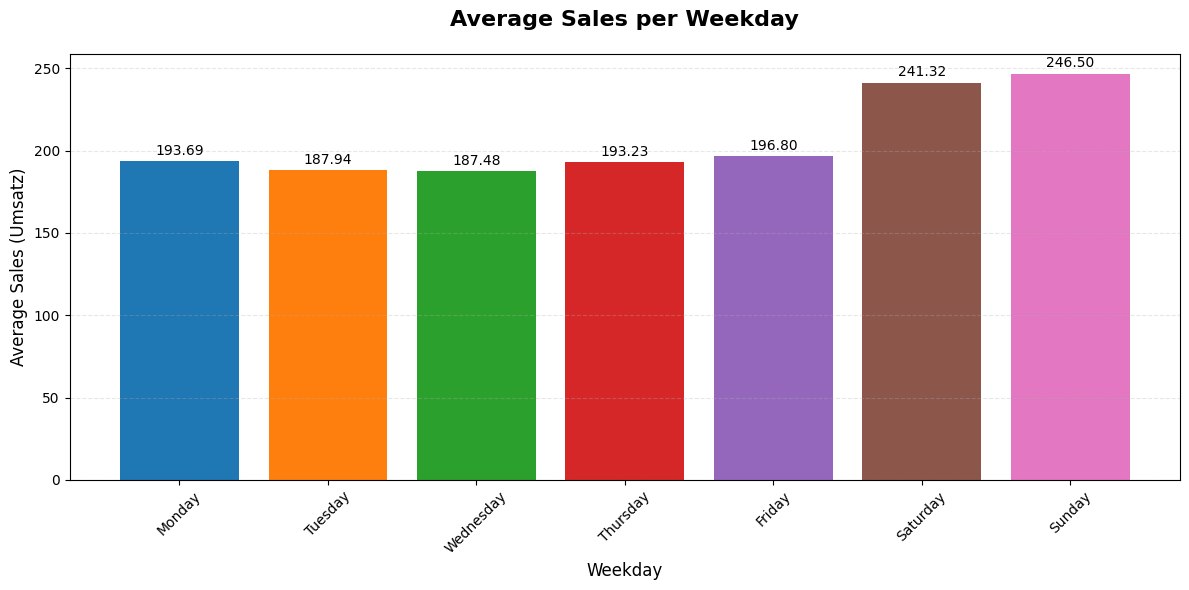


Summary Statistics:
Weekday      Avg Sales    Count   
----------------------------------------
Monday       193.69       1324    
Tuesday      187.94       1345    
Wednesday    187.48       1342    
Thursday     193.23       1334    
Friday       196.80       1311    
Saturday     241.32       1336    
Sunday       246.50       1342    

Overall average sales: 206.75
Highest average: 246.50 (Sunday)
Lowest average: 187.48 (Wednesday)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('umsatzdaten_gekuerzt.csv')

# Convert the 'Datum' column to datetime
df['Datum'] = pd.to_datetime(df['Datum'])

# Extract weekday from the date (0=Monday, 6=Sunday)
df['Weekday'] = df['Datum'].dt.dayofweek

# Create a mapping for weekday names
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday_Name'] = df['Weekday'].map(lambda x: weekday_names[x])

# Calculate average sales per weekday
avg_sales_per_weekday = df.groupby('Weekday_Name')['Umsatz'].mean()
print(avg_sales_per_weekday)

# Reorder to start with Monday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_sales_per_weekday = avg_sales_per_weekday.reindex(weekday_order)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

# Customize the chart
plt.title('Average Sales per Weekday', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average Sales (Umsatz)', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the chart
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("=" * 40)
print(f"{'Weekday':<12} {'Avg Sales':<12} {'Count':<8}")
print("-" * 40)

for weekday in weekday_order:
    if weekday in avg_sales_per_weekday.index:
        avg_sales = avg_sales_per_weekday[weekday]
        count = len(df[df['Weekday_Name'] == weekday])
        print(f"{weekday:<12} {avg_sales:<12.2f} {count:<8}")

print(f"\nOverall average sales: {df['Umsatz'].mean():.2f}")
print(f"Highest average: {avg_sales_per_weekday.max():.2f} ({avg_sales_per_weekday.idxmax()})")
print(f"Lowest average: {avg_sales_per_weekday.min():.2f} ({avg_sales_per_weekday.idxmin()})")
